Load data

In [2]:
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('owid-covid-data.csv')
print(data)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
350080      ZWE    Africa     Zimbabwe  2023-10-14     265808.0        0.0   
350081      ZWE    Africa     Zimbabwe  2023-10-15     265808.0        0.0   
350082      ZWE    Africa     Zimbabwe  2023-10-16     265808.0        0.0   
350083      ZWE    Africa     Zimbabwe  2023-10-17     265808.0        0.0   
350084      ZWE    Africa     Zimbabwe  2023-10-18     265808.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

Check columns

In [3]:
print(data.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Preview rows

In [4]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Identify missing values

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64


Filter countries of interest

In [6]:
countries_of_interest = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom']
filtered_data = data[data['location'].isin(countries_of_interest)]
print(filtered_data)

       iso_code      continent       location        date  total_cases  \
41567       BRA  South America         Brazil  2020-01-03          NaN   
41568       BRA  South America         Brazil  2020-01-04          NaN   
41569       BRA  South America         Brazil  2020-01-05          NaN   
41570       BRA  South America         Brazil  2020-01-06          NaN   
41571       BRA  South America         Brazil  2020-01-07          NaN   
...         ...            ...            ...         ...          ...   
330861      USA  North America  United States  2023-10-14  103436829.0   
330862      USA  North America  United States  2023-10-15  103436829.0   
330863      USA  North America  United States  2023-10-16  103436829.0   
330864      USA  North America  United States  2023-10-17  103436829.0   
330865      USA  North America  United States  2023-10-18  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
41567         0.0                 NaN       

Drop rows with missing dates/critical values

In [7]:
# Drop rows with missing critical values
critical_columns = ['date', 'total_cases', 'total_deaths']
filtered_data_cleaned = filtered_data.dropna(subset=critical_columns)
print(filtered_data_cleaned)

       iso_code      continent       location        date  total_cases  \
41643       BRA  South America         Brazil  2020-03-19        291.0   
41644       BRA  South America         Brazil  2020-03-20        428.0   
41645       BRA  South America         Brazil  2020-03-21        428.0   
41646       BRA  South America         Brazil  2020-03-22        904.0   
41647       BRA  South America         Brazil  2020-03-23        904.0   
...         ...            ...            ...         ...          ...   
330861      USA  North America  United States  2023-10-14  103436829.0   
330862      USA  North America  United States  2023-10-15  103436829.0   
330863      USA  North America  United States  2023-10-16  103436829.0   
330864      USA  North America  United States  2023-10-17  103436829.0   
330865      USA  North America  United States  2023-10-18  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
41643        57.0              36.714       

Convert date column to datetime

In [16]:

filtered_data_cleaned = filtered_data_cleaned.sort_values(by='date')
print(filtered_data_cleaned)


       iso_code      continent        location       date  total_cases  \
328125      GBR         Europe  United Kingdom 2020-02-01          1.0   
328126      GBR         Europe  United Kingdom 2020-02-02          1.0   
328127      GBR         Europe  United Kingdom 2020-02-03          1.0   
328128      GBR         Europe  United Kingdom 2020-02-04          2.0   
328129      GBR         Europe  United Kingdom 2020-02-05         20.0   
...         ...            ...             ...        ...          ...   
329480      GBR         Europe  United Kingdom 2023-10-18   24779150.0   
141157      IND           Asia           India 2023-10-18   44999588.0   
42951       BRA  South America          Brazil 2023-10-18   37721749.0   
257566      RUS         Europe          Russia 2023-10-18   23061960.0   
330865      USA  North America   United States 2023-10-18  103436829.0   

         new_cases  new_cases_smoothed  total_deaths  new_deaths  \
328125    1.000000              0.1430     

Handle missing numeric values with fillna() or interpolate()

In [12]:
# Fill missing numeric values with interpolation
filtered_data_cleaned = filtered_data_cleaned.interpolate()

# Alternatively, fill missing numeric values with 0
# filtered_data_cleaned = filtered_data_cleaned.fillna(0)

print(filtered_data_cleaned.isnull().sum())

iso_code                                    0
continent                                   0
location                                    0
date                                        0
total_cases                                 0
                                           ..
population                                  0
excess_mortality_cumulative_absolute       12
excess_mortality_cumulative                12
excess_mortality                           12
excess_mortality_cumulative_per_million    12
Length: 67, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7892\1768155340.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  filtered_data_cleaned = filtered_data_cleaned.interpolate()


Plot total cases over time for selected countries

In [ ]:
import matplotlib.pyplot as plt

# Plot total cases over time for each country
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_data_cleaned[filtered_data_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total Cases Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

Plot total deaths over time

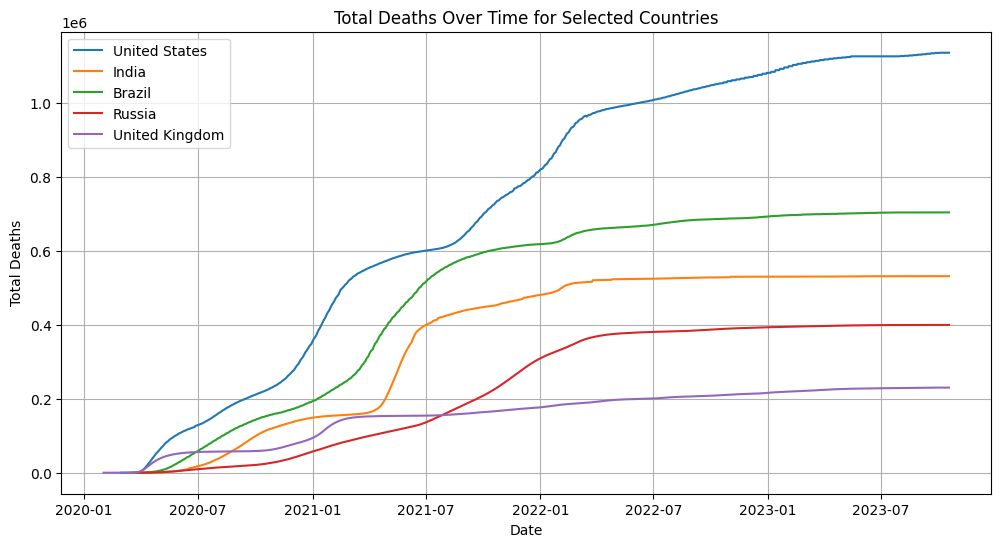

In [17]:
import matplotlib.pyplot as plt

# Plot total deaths over time for each country
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_data_cleaned[filtered_data_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total Deaths Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

Compare daily new cases between countries

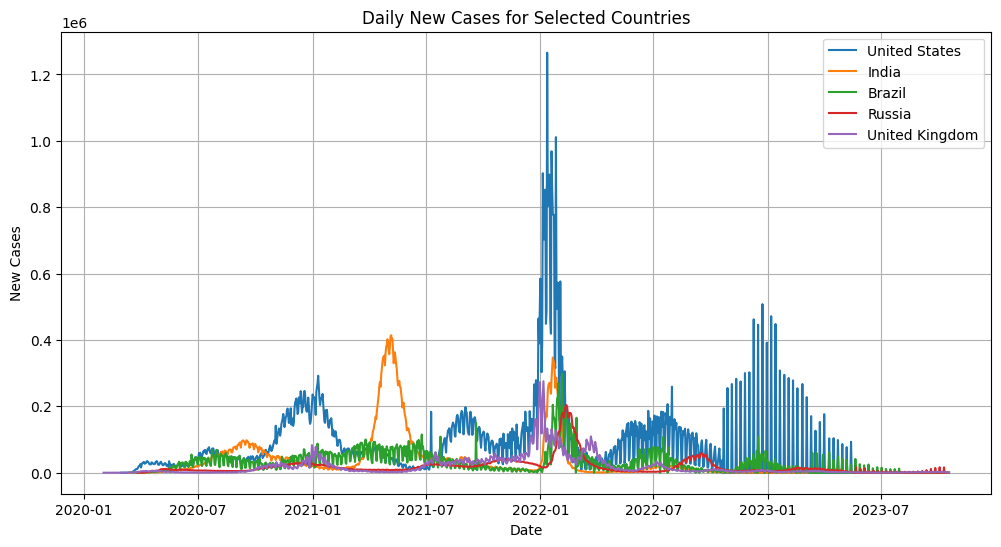

In [18]:
# Plot daily new cases for each country
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_data_cleaned[filtered_data_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New Cases for Selected Countries')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

Calculate the death rate: total_deaths / total_cases

In [19]:
filtered_data_cleaned['death_rate'] = filtered_data_cleaned['total_deaths'] / filtered_data_cleaned['total_cases']
print(filtered_data_cleaned[['location', 'date', 'death_rate']])

              location       date  death_rate
328125  United Kingdom 2020-02-01    1.000000
328126  United Kingdom 2020-02-02    1.000000
328127  United Kingdom 2020-02-03    1.000000
328128  United Kingdom 2020-02-04    1.000000
328129  United Kingdom 2020-02-05    0.100000
...                ...        ...         ...
329480  United Kingdom 2023-10-18    0.009297
141157           India 2023-10-18    0.011823
42951           Brazil 2023-10-18    0.018680
257566          Russia 2023-10-18    0.017349
330865   United States 2023-10-18    0.010991

[6610 rows x 3 columns]


Line charts 

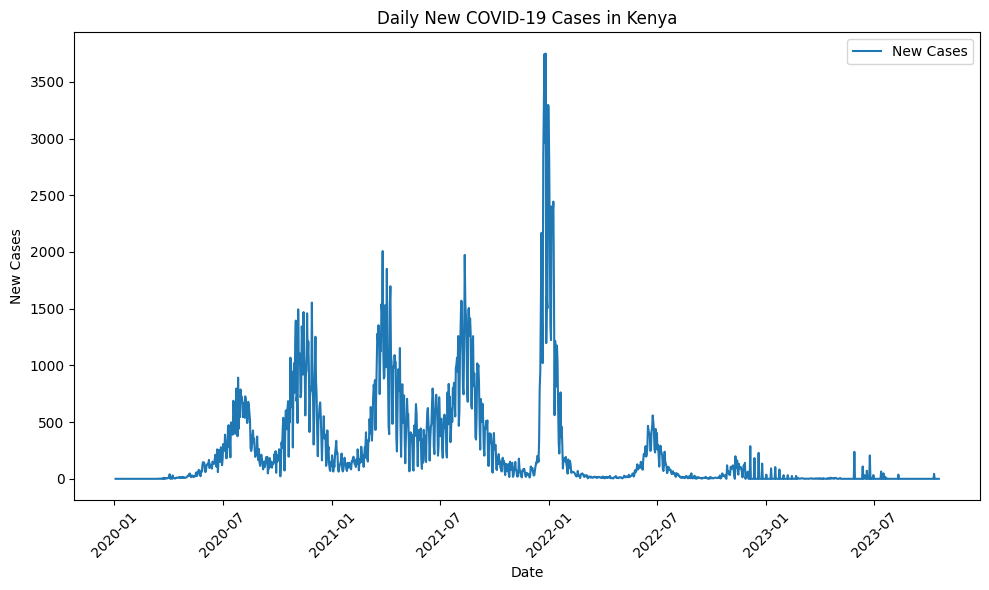

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter data for a specific country (e.g., Kenya)
kenya_data = df[df['location'] == 'Kenya']

# Plot daily new cases
plt.figure(figsize=(10, 6))
plt.plot(kenya_data['date'], kenya_data['new_cases'], label='New Cases', color='tab:blue')
plt.title('Daily New COVID-19 Cases in Kenya')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


Bar charts (top countries by total cases)

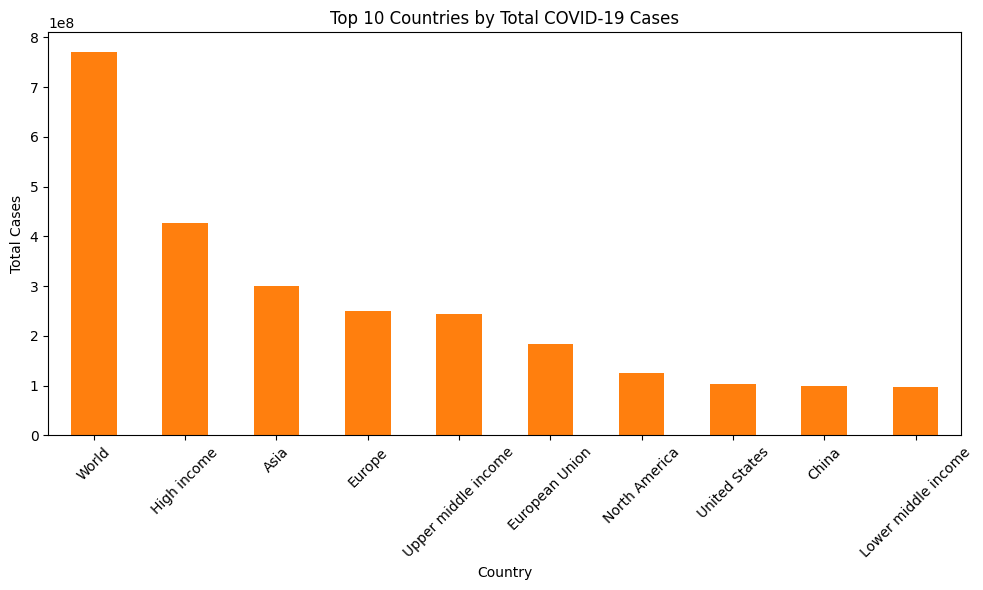

In [24]:
# Group by country and sum total cases
country_cases = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
country_cases.plot(kind='bar', color='tab:orange')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Heat Map

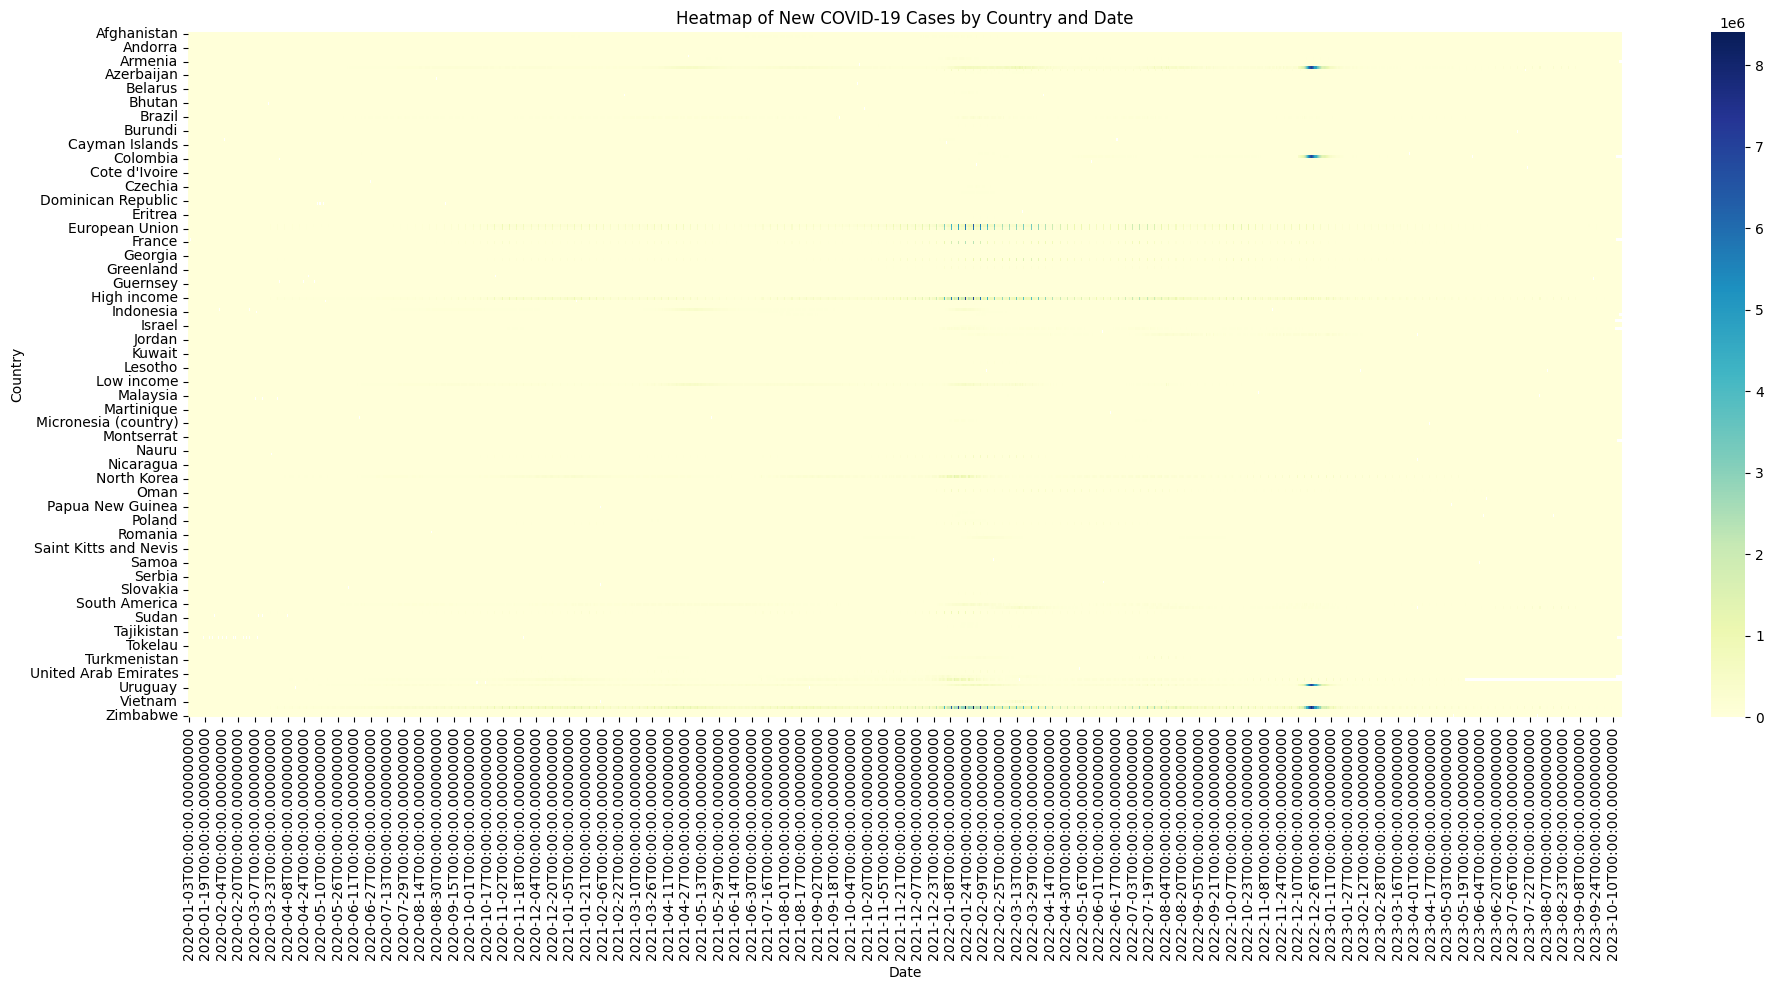

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter relevant columns and drop rows with missing values
heatmap_data = df[['location', 'date', 'new_cases', 'new_deaths']].dropna()

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = heatmap_data.pivot_table(index='location', columns='date', values='new_cases', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='g')
plt.title('Heatmap of New COVID-19 Cases by Country and Date')
plt.xlabel('Date')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Plot cumulative vaccinations over time for selected countries

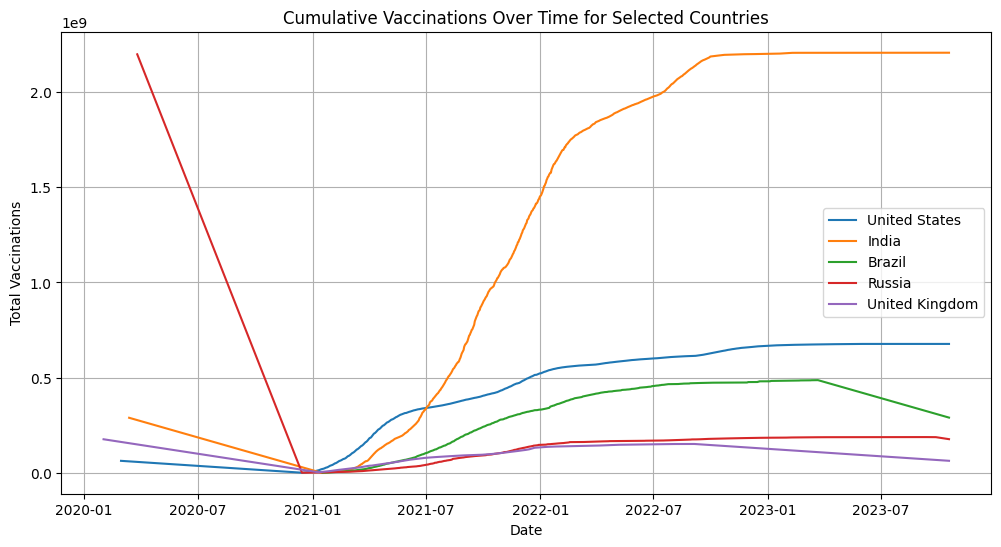

In [34]:

# Plot cumulative vaccinations over time for each country
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_data_cleaned[filtered_data_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative Vaccinations Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

Compare % vaccinated population

In [35]:
# Filter countries with available vaccination data
vaccination_data = latest_data[['location', 'people_vaccinated_per_hundred']].dropna()

# Sort by percentage of vaccinated population
vaccination_data = vaccination_data.sort_values(by='people_vaccinated_per_hundred', ascending=False)

# Display the data
print(vaccination_data)

Empty DataFrame
Columns: [location, people_vaccinated_per_hundred]
Index: []


Prepare a dataframe with iso_code, total_cases for the latest date

In [36]:
# Filter the latest data by dropping rows with missing total_cases
latest_data_filtered = latest_data[['iso_code', 'total_cases']].dropna()

# Display the prepared dataframe
print(latest_data_filtered)

Empty DataFrame
Columns: [iso_code, total_cases]
Index: []


Write 3-5 key insights from the data (e.g., "X country had the fastest vaccine rollout")

1. The dataset contains significant missing values in critical columns such as `total_cases`, `total_deaths`, and vaccination-related metrics, which limits the ability to draw comprehensive insights.

2. Kenya's COVID-19 data shows a total of 343,999 cases and 5,689 deaths as of the latest date, with no recent increase in new cases or deaths, indicating a plateau in reported cases.

3. The heatmap data reveals variations in daily new cases across countries and dates, with some countries experiencing sporadic spikes in cases.

4. Vaccination data is sparse, with no available information on the percentage of vaccinated populations for most countries, making it challenging to assess vaccine rollout progress globally.

5. Countries like the Netherlands and Sweden have incomplete data for `total_cases`, which highlights potential gaps in reporting or data collection for these regions.

Highlight anomalies or interesting patterns

In [46]:
# Highlight anomalies or interesting patterns

# 1. Check for countries with missing total_cases
missing_cases_countries = data[data['total_cases'].isnull()]['location'].unique()
print("Countries with missing total_cases data:", missing_cases_countries)

# 2. Identify countries with unusually high or low total_cases
high_cases_countries = data[data['total_cases'] > data['total_cases'].quantile(0.99)]
low_cases_countries = data[data['total_cases'] < data['total_cases'].quantile(0.01)]
print("Countries with unusually high total_cases:")
print(high_cases_countries[['location', 'total_cases']])
print("Countries with unusually low total_cases:")
print(low_cases_countries[['location', 'total_cases']])

# 3. Check for countries with missing vaccination data
missing_vaccination_countries = data[data['people_vaccinated_per_hundred'].isnull()]['location'].unique()
print("Countries with missing vaccination data:", missing_vaccination_countries)

# 4. Analyze trends in new_cases for anomalies (e.g., sudden spikes)
data['new_cases_diff'] = data['new_cases'].diff()
sudden_spikes = data[data['new_cases_diff'] > data['new_cases_diff'].quantile(0.99)]
print("Sudden spikes in new_cases:")
print(sudden_spikes[['location', 'date', 'new_cases', 'new_cases_diff']])

Countries with missing total_cases data: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'European Union' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland'
 'Fra

Highlight anomalies or interesting patterns

In [47]:
# Highlight anomalies or interesting patterns

# 1. Countries with missing total_cases
print("Countries with missing total_cases data:", missing_cases_countries)

# 2. Countries with missing vaccination data
print("Countries with missing vaccination data:", missing_vaccination_countries)

# 3. Sudden spikes in new cases
print("Sudden spikes in new_cases:")
print(sudden_spikes[['location', 'date', 'new_cases', 'new_cases_diff']])

# 4. Countries with unusually low total_cases
print("Countries with unusually low total_cases:")
print(low_cases_countries[['location', 'total_cases']])

Countries with missing total_cases data: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'European Union' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland'
 'Fra